# Что такое pandas?

Если очень кратко, то pandas – это библиотека, которая предоставляет очень удобные с точки зрения использования инструменты для хранения данных и работе с ними.

Официальный сайт pandas находится по ссылке http://pandas.pydata.org/. Стоит отметить, что документация (http://pandas.pydata.org/pandas-docs/stable/) по этому продукту очень хорошая. Если вы знаете английский язык, то для вас не будет большой проблемой разобраться с pandas.

Pandas прекрасно подходит для работы с одномерными и двумерными таблицами данных, хорошо интегрирован с внешним миром – есть возможность работать с файлами CSV, таблицами Excel, может стыковаться с языком R.

Пора переходить к практике!

Импортируем нужные нам библиотеки.

In [1]:
import numpy as np
import pandas as pd

Конструктор класса Series выглядит следующим образом:

In [3]:
pd.Series(data=None, index=None, dtype=None, copy=False)

Series([], dtype: float64)

data – массив, словарь или скалярное значение, на базе которого будет построен Series;

index – список меток, который будет использоваться для доступа к элементам Series. Длина списка должна быть равна длине data;

dtype – объект numpy.dtype, определяющий тип данных;

copy – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

# Создание Series из списка Python

Самый простой способ создать Series – это передать в качестве единственного параметра в конструктор класса список Python.

In [4]:
s1 = pd.Series([1, 2, 3, 4, 5])
print(s1)

0    1
1    2
2    3
3    4
4    5
dtype: int64


Можно попробовать использоваться больше возможностей из тех, что предлагает pandas, для этого передадим в качестве второго элемента список строк (в нашем случае – это отдельные символы). 

In [6]:
s2 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
print(s2)

a    1
b    2
c    3
d    4
e    5
dtype: int64


# Создание Series из ndarray массива из numpy

In [10]:
ndarr = np.array([1, 2, 3, 4, 5])
type(ndarr)
np.ndarray

numpy.ndarray

Теперь создадим Series с буквенными метками.

In [11]:
s3 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])
print(s3)

a    1
b    2
c    3
d    4
e    5
dtype: int32


# Создание Series из словаря (dict)

Еще один способ создать структуру Series – это использовать словарь для одновременного задания меток и значений.

In [12]:
d = {'a':1, 'b':2, 'c':3}
s4 = pd.Series(d)
print(s4)

a    1
b    2
c    3
dtype: int64


Ключи (keys) из словаря d станут метками структуры s4, а значения (values) словаря – значениями в структуре.

# Создание Series с использованием константы

In [13]:
a = 7
s5 = pd.Series(a, ['a', 'b', 'c'])
print(s5)

a    7
b    7
c    7
dtype: int64


# Работа с элементами Series

К элементам Series можно обращаться по численному индексу, при таком подходе работа со структурой не отличается от работы со списками в Python.

In [15]:
s6 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
s6[2]

3

Можно использовать метку, тогда работа с Series будет похожа на работу со словарем (dict) в Python.

In [16]:
s6['d']

4

Доступно получение slice’ов.

In [17]:
s6[:2]

a    1
b    2
dtype: int64

В поле для индекса можно поместить условное выражение.

In [18]:
s6[s6 <= 3]

a    1
b    2
c    3
dtype: int64

Со структурами Series можно работать как с векторами: складывать, умножать вектор на число и т.п.

In [19]:
s7 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
s6 + s7

a    11
b    22
c    33
d    44
e    55
dtype: int64

In [62]:
s6 * 3

a     3
b     6
c     9
d    12
e    15
dtype: int64

# Структура данных DataFrame

Если Series представляет собой одномерную структуру, которую для себя можно представить как таблицу с одной строкой, то DataFrame – это уже двумерная структура – полноценная таблица с множеством строк и столбцов.

Конструктор класса DataFrame выглядит так:


In [25]:
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

""


data – массив ndarray, словарь (dict) или другой DataFrame;

index – список меток для записей (имена строк таблицы);

columns – список меток для полей (имена столбцов таблицы);

dtype – объект numpy.dtype, определяющий тип данных;

copy – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

# Создание DataFrame из словаря

В данном случае будет использоваться одномерный словарь, элементами которого будут списки, структуры Series и т.д.

Начнем с Series.

In [32]:
d = {"price":pd.Series([1, 2, 3], index=['v1', 'v2', 'v3']), "count": pd.Series([10, 12, 7], index=['v1', 'v2', 'v3'])}
df1 = pd.DataFrame(d)
print(df1)

    price  count
v1      1     10
v2      2     12
v3      3      7


In [28]:
print(df1.index)

Index(['v1', 'v2', 'v3'], dtype='object')


In [33]:
print(df1.columns)

Index(['price', 'count'], dtype='object')


Теперь построим аналогичный словарь, но на элементах ndarray.

In [34]:
d2 = {"price":np.array([1, 2, 3]), "count": np.array([10, 12, 7])}
In [9]: df2 = pd.DataFrame(d2, index=['v1', 'v2', 'v3'])
In [10]: print(df2)

    price  count
v1      1     10
v2      2     12
v3      3      7


In [35]:
 print(df2.index)

Index(['v1', 'v2', 'v3'], dtype='object')


In [36]:
print(df2.columns)

Index(['price', 'count'], dtype='object')


Как видно – результат аналогичен предыдущему. Вместо ndarray можно использовать обычный список из Python.

# Создание DataFrame из списка словарей

До это мы создавали DataFrame из словаря, элементами которого были структуры Series, списки и массивы, сейчас мы создадим DataFrame из списка, элементами которого являются словари.

In [37]:
d3 = [{"price": 3, "count":8}, {"price": 4, "count": 11}]
df3 = pd.DataFrame(d3)
print(df3)

   count  price
0      8      3
1     11      4


In [38]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
count    2 non-null int64
price    2 non-null int64
dtypes: int64(2)
memory usage: 112.0 bytes
None


# Создание DataFrame из двумерного массива

In [39]:
nda1 = np.array([[1, 2, 3], [10, 20, 30]])
df4 = pd.DataFrame(nda1)
print(df4)

    0   1   2
0   1   2   3
1  10  20  30


# Работа с элементами DataFrame

Сейчас мы рассмотрим наиболее часто используемые способы работы с элементами DataFrame.

Основные подходы представлены в таблице ниже.


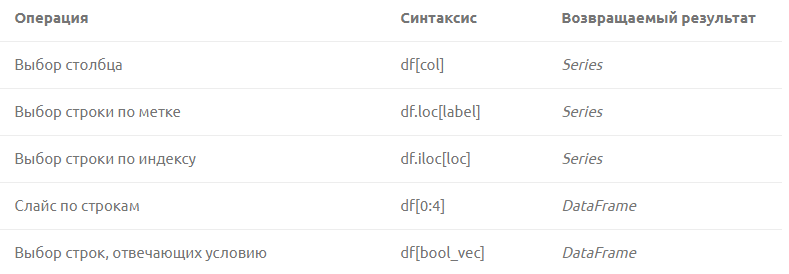

Теперь посмотрим, как использовать данные операций на практике.

Для начала создадим DataFrame.

In [42]:
d = {"price":np.array([1, 2, 3]), "count": np.array([10, 20, 30])}
df = pd.DataFrame(d, index=['a', 'b', 'c'])
print(df)

   price  count
a      1     10
b      2     20
c      3     30


Операция: выбор столбца.

In [60]:
df['count']


a    10
b    20
c    30
Name: count, dtype: int32

Операция: выбор строки по метке.

In [44]:
df.loc['a']

price     1
count    10
Name: a, dtype: int32

Операция: выбор строки по индексу.

In [45]:
df.iloc[1]

price     2
count    20
Name: b, dtype: int32

Операция: slice по строкам.

In [51]:
df[0:2]

,price,count
a,1,10
b,2,20


Операция: выбор строк, отвечающих условию.

In [54]:
df[df['count'] >= 20]

,price,count
b,2,20
c,3,30


In [56]:
df.price

a    1
b    2
c    3
Name: price, dtype: int32

# Получение случайного набора из структур pandas

Библиотека pandas предоставляет возможность получить случайный набор данных из уже существующей структуры. Такой функционал предоставляет как Series так и DataFrame. У данных структур есть метод sample(), предоставляющий случайную подвыборку.

Начнем наше знакомство с этим методом на примере структуры Series.

In [63]:
s = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])

Для того, чтобы выбрать случайным образом элемент из Series воспользуйтесь следующим синтаксисом.

In [64]:
s.sample()

d    40
dtype: int64

Можно сделать выборку из нескольких элементов, для этого нужно передать нужное количество через параметр n.

In [65]:
s.sample(n=3)

e    50
b    20
a    10
dtype: int64

Также есть возможность указать долю от общего числа объектов в структуре, используя параметр frac.

In [66]:
s.sample(frac=0.3)

d    40
c    30
dtype: int64

Очень интересной особенностью является то, что мы можем передать вектор весов, длина которого должна быть равна количеству элементов в структуре. Сумма весов должна быть равна единице, вес, в данном случае, это вероятность появления элемента в выборке.

В нашей тестовой структуре пять элементов, сформируем вектор весов для нее и сделаем выборку из трех элементов.

In [68]:
w = [0.1, 0.2, 0.5, 0.1, 0.1]

s.sample(n = 3, weights=w)

b    20
c    30
d    40
dtype: int64

Данный функционал также доступен и для структуры DataFrame.

In [70]:
d = {"price":[1, 2, 3, 5, 6], "count": [10, 20, 30, 40, 50], "percent": [24, 51, 71, 25, 42]}

df = pd.DataFrame(d)

df.sample()

,price,count,percent
3,5,40,25


При работе с DataFrame можно указать ось.

In [84]:
df.sample(axis=1)

,percent
0,24
1,51
2,71
3,25
4,42


In [83]:
df.sample(n=2, axis=1)

,percent,price
0,24,1
1,51,2
2,71,3
3,25,5
4,42,6


In [86]:
df.sample(n=2)

,price,count,percent
0,1,10,24
4,6,50,42


# Добавление элементов в структуры

Увеличение размера структуры – т.е. добавление новых, дополнительных, элементов – это довольно распространенная задача. В pandas она решается очень просто. И самый быстрый способ понять, как это делать – попробовать реализовать эту задачу на практике.

Добавление нового элемента в структуру Series.


In [87]:
s = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])

In [88]:
s

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [89]:
s['f'] = 60

In [90]:
s

a    10
b    20
c    30
d    40
e    50
f    60
dtype: int64

Добавление нового элемента в структуру DataFrame.

In [94]:
d = {"price":[1, 2, 3, 5, 6], "count": [10, 20, 30, 40, 50], "percent": [24, 51, 71, 25, 42]}
df = pd.DataFrame(d)
df

,price,count,percent
0,1,10,24
1,2,20,51
2,3,30,71
3,5,40,25
4,6,50,42


In [96]:
df['value'] = [3, 14, 7, 91, 5]
df

,price,count,percent,value
0,1,10,24,3
1,2,20,51,14
2,3,30,71,7
3,5,40,25,91
4,6,50,42,5


# Индексация с использованием логических выражений

На практике очень часто приходится получать определенную подвыборку из существующего набора данных. Например, получить все товары, скидка на которые больше пяти процентов, или выбрать из базы информацию о сотрудниках мужского пола старше 30 лет. Это очень похоже на процесс фильтрации при работе с таблицами или получение выборки из базы данных. Похожий функционал реализован в pandas и мы уже касались этого вопроса, когда рассматривали различные подходы к индексации.

Условное выражение записывается вместо индекса в квадратных скобках при обращении к элементам структуры.

При работе с Series возможны следующие варианты использования.

In [98]:
s = pd.Series([10, 20, 30, 40, 50, 10, 10], ['a', 'b', 'c', 'd', 'e', 'f', 'g'])
s[s>30]

d    40
e    50
dtype: int64

In [99]:
s[s==10]

a    10
f    10
g    10
dtype: int64

In [100]:
s[(s>=30) & (s<50)]

c    30
d    40
dtype: int64

При работе с DataFrame необходимо указывать столбец по которому будет производиться фильтрация (выборка).

In [101]:
d = {"price":[1, 2, 3, 5, 6], "count": [10, 20, 30, 40, 50], "percent": [24, 51, 71, 25, 42], "cat":["A", "B", "A", "A", "C"]}
df = pd.DataFrame(d)
df

,price,count,percent,cat
0,1,10,24,A
1,2,20,51,B
2,3,30,71,A
3,5,40,25,A
4,6,50,42,C


In [102]:
df[df["price"] > 3]

,price,count,percent,cat
3,5,40,25,A
4,6,50,42,C


В качестве логического выражения можно использовать довольно сложные конструкции с использованием map, filter, лямбда-выражений и т.п.

In [104]:
fn = df["cat"].map(lambda x: x == "A")
df[fn]

,price,count,percent,cat
0,1,10,24,A
2,3,30,71,A
3,5,40,25,A


# Использование isin для работы с данными в pandas

По структурам данных pandas можно строить массивы с данными типа boolean, по которому можно проверить наличие или отсутствие того или иного элемента. Проще всего это показать на примере.

In [105]:
s = pd.Series([10, 20, 30, 40, 50, 10, 10], ['a', 'b', 'c', 'd', 'e', 'f', 'g'])
s.isin([10, 20])

a     True
b     True
c    False
d    False
e    False
f     True
g     True
dtype: bool

Работа с DataFrame аналогична работе со структурой Series.

In [106]:
df = pd.DataFrame({"price":[1, 2, 3, 5, 6], "count": [10, 20, 30, 40, 50], "percent": [24, 51, 71, 25, 42]})

In [111]:
df.isin([1, 3, 25, 30, 10, 71])

,price,count,percent
0,True,True,False
1,False,False,False
2,True,True,True
3,False,False,True
4,False,False,False


# Pandas и отсутствующие данные

Для начала, хочется сказать, что в документации по библиотеке pandas есть целый раздел, посвященный данной тематике(http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

Для наших экспериментов создадим структуру DataFrame, которая будет содержать пропуски. Для этого импортируем необходимые нам библиотеки.

In [112]:
import pandas as pd
from io import StringIO

После этого создадим объект в формате csv. CSV – это один из наиболее простых и распространенных форматов хранения данных, в котором элементы отделяются друг от друга запятыми, более подробно о нем можете прочитать здесь(https://ru.wikipedia.org/wiki/CSV).

In [114]:
data = 'price,count,percent\n1,10,\n2,20,51\n3,30,'
df = pd.read_csv(StringIO(data))
df

,price,count,percent
0,1,10,NaN
1,2,20,51.0
2,3,30,NaN


В нашем примере, у объектов с индексами 0 и 2 отсутствуют данные в поле percent. Отсутствующие данные помечаются как NaN. Добавим к существующей структуре еще один объект (запись), у которого будет отсутствовать значение в поле count.

In [115]:
df.loc[3] = {'price':4, 'count':None, 'percent':26.3}
df

,price,count,percent
0,1.0,10.0,NaN
1,2.0,20.0,51.0
2,3.0,30.0,NaN
3,4.0,NaN,26.3


Для начала обратимся к методам из библиотеки pandas, которые позволяют быстро определить наличие элементов NaN в структурах. Если таблица небольшая, то можно использовать библиотечный метод isnull. Выглядит это так.

In [116]:
pd.isnull(df)

,price,count,percent
0,False,False,True
1,False,False,False
2,False,False,True
3,False,True,False


В нашем примере видно, что объект df имеет три столбца (count, percent и price), при этом в столбце price все объекты значимы – не NaN, в столбце count – один NaN объект, в поле percent – два NaN объекта. Можно воспользоваться следующим подходом для получения количества NaN элементов в записях.

In [117]:
df.isnull().sum()

price      0
count      1
percent    2
dtype: int64

# Замена отсутствующих данных

Отсутствующие данные объектов можно заменить на конкретные числовые значения, для этого можно использовать метод fillna(). Для экспериментов будем использовать структуру df, созданную в предыдущем разделе.

In [118]:
df.fillna(0)

,price,count,percent
0,1.0,10.0,0.0
1,2.0,20.0,51.0
2,3.0,30.0,0.0
3,4.0,0.0,26.3


Этот метод не изменяет текущую структуру, он возвращает структуру DataFrame, созданную на базе существующей, с заменой NaN значений на те, что переданы в метод в качестве аргумента. Данные можно заполнить средним значением по столбцу.

In [123]:
df.fillna(df.mean())

,price,count,percent
0,1.0,10.0,38.65
1,2.0,20.0,51.00
2,3.0,30.0,38.65
3,4.0,20.0,26.30


In [121]:
df.mean()

price       2.50
count      20.00
percent    38.65
dtype: float64

# Удаление объектов/столбцов с отсутствующими данными

Довольно часто используемый подход при работе с отсутствующими данными – это удаление записей (строк) или полей (столбцов), в которых встречаются пропуски. Для того, чтобы удалить все объекты, которые содержат значения NaN воспользуйтесь методом dropna() без аргументов.

In [124]:
df.dropna()

,price,count,percent
1,2.0,20.0,51.0


Вместо записей, можно удалить поля, для этого нужно вызвать метод dropna с аргументом axis=1.

In [126]:
df.dropna(axis=1)

,price
0,1.0
1,2.0
2,3.0
3,4.0


pandas позволяет задать порог на количество не-NaN элементов. В приведенном ниже примере будут удалены все столбцы, в которых количество не-NaN элементов меньше трех.

In [127]:
df.dropna(axis = 1, thresh=3)

,price,count
0,1.0,10.0
1,2.0,20.0
2,3.0,30.0
3,4.0,NaN
